<a href="https://colab.research.google.com/github/joaochenriques/MCTE_2020_2021/blob/main/DiskActuator/DiskActuator_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import numpy as np
from pylab import *

In [107]:
Fr1 = 0.05
B = 0.2

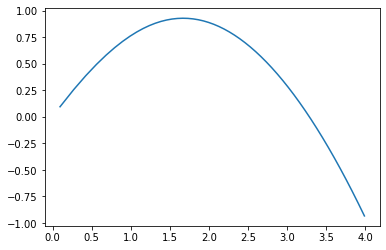

In [108]:
Fr4b_lst = np.linspace( Fr1*1.01, Fr1*2 )
C_T_lst = []
C_P_lst = []

for Fr4b in Fr4b_lst:
  ζ4 = (1/2.)*Fr1**2 - 1/2.*Fr4b**2 + 1
  Fr4t = (Fr1 - Fr4b*ζ4 + sqrt(B**2*Fr4b**2 - 2*B*Fr1**2 + 2*B*Fr1*Fr4b + B*ζ4**2 - B + Fr1**2 - 2*Fr1*Fr4b*ζ4 + Fr4b**2*ζ4**2))/B
  ζ4b = (Fr1 - Fr4t*ζ4)/(Fr4b - Fr4t)
  ζ4t = (-Fr1 + Fr4b*ζ4)/(Fr4b - Fr4t)
  Fr2t = Fr4t*ζ4t/B
  C_T = (Fr4b**2 - Fr4t**2)/Fr1**2
  C_P = C_T*Fr2t/Fr1

  C_P_lst.append( C_P )
  C_T_lst.append( C_T )

plot( C_T_lst, C_P_lst );

In [96]:
Fr2t = 0.02
ζ2t = 0.99

(Fr1**2/2+1) - (Fr2t**2/2+ζ2t), Fr4t*ζ4t - Fr2t*ζ2t

(0.010829499999999936, -0.016614953022712296)

In [82]:
ζ2t = (1/6)*Fr1**2 - 1/3*(-1/2*Fr1**2 - 1)**2/((27/4)*Fr4t**2*ζ4t**2 + (-1/2*Fr1**2 - 1)**3 + (1/2)*sqrt(-4*(-1/2*Fr1**2 - 1)**6 + ((27/2)*Fr4t**2*ζ4t**2 + 2*(-1/2*Fr1**2 - 1)**3)**2))**(1/3) - 1/3*((27/4)*Fr4t**2*ζ4t**2 + (-1/2*Fr1**2 - 1)**3 + (1/2)*sqrt(-4*(-1/2*Fr1**2 - 1)**6 + ((27/2)*Fr4t**2*ζ4t**2 + 2*(-1/2*Fr1**2 - 1)**3)**2))**(1/3) + 1/3
C_P == C_T*Fr2t/Fr1

ValueError: ignored

In [69]:
-4*(-1/2*Fr1**2 - 1)**6 + ((27/2)*Fr4t**2*ζ4t**2 + 2*(-1/2*Fr1**2 - 1)**3)**2

-0.015640307643447038